In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import mglearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler


In [2]:
iris_dataset = load_iris()

In [3]:
iris_dataframe = pd.DataFrame(iris_dataset.data)
iris_dataframe.columns = iris_dataset.feature_names
iris_dataframe['target'] = iris_dataset.target
iris_dataframe['species'] = iris_dataframe.target.apply(lambda x : iris_dataset.target_names[x])

In [4]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
print(iris_dataframe.shape)

(150, 6)


## Statistical Summary

In [6]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Class Distribution 

In [7]:
print(iris_dataframe.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


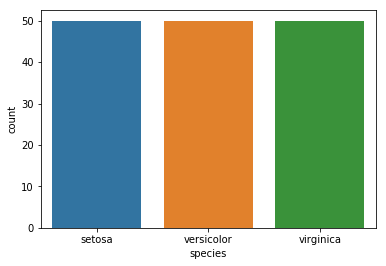

In [8]:
sns.countplot(data=iris_dataframe, x='species')

## Null Values

In [9]:
iris_dataframe.isnull().values.any()

False

In [10]:
iris_dataframe.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

# Univariate Plots

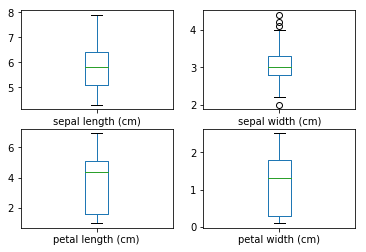

In [11]:
iris_dataframe.drop('target', 1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

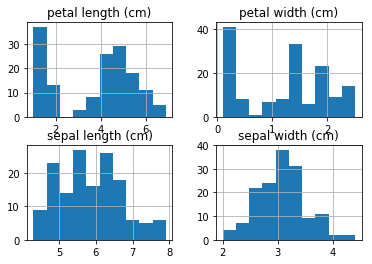

In [12]:
iris_dataframe.drop('target', 1).hist()
plt.show()

## Box Plot

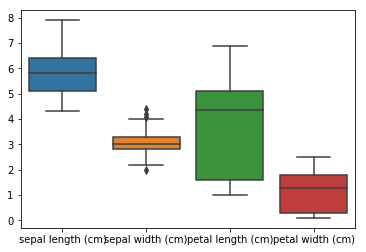

In [13]:
box_plot = sns.boxplot(data = iris_dataframe.drop('target', 1))

# Multivariate Plots

## Scatter Matrix

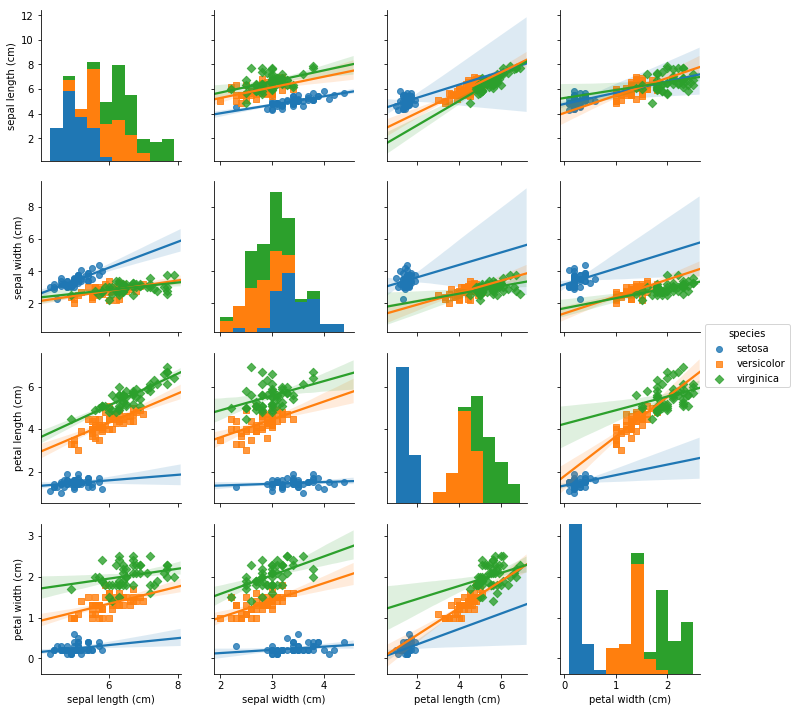

In [14]:
scatter_matrix = sns.pairplot(iris_dataframe.drop('target', 1), kind="reg", hue="species", markers=["o", "s", "D"])

## Correlation Matrix 

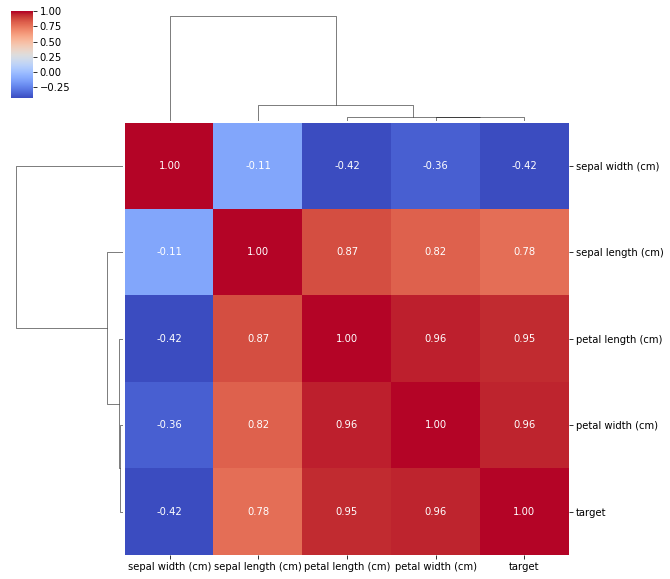

In [15]:
coorrelation_matrix = sns.clustermap(iris_dataframe.corr(),cmap = 'coolwarm', annot=True, fmt='.2f')

# Machine Learning

## Data Splitting

In [16]:
X = iris_dataframe.drop(['species', 'target'], axis=1)
y = iris_dataframe['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
print(X_train.shape) 
print(X_test.shape)

(112, 4)
(38, 4)


## Feature Scaling

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Models

## K-Nearest Neighbors

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
print("Training set score: {:.3f}".format(knn.score(X_train, y_train))) 
print("Test set accuracy: {:.3f}".format(knn.score(X_test, y_test)))

Training set score: 0.955
Test set accuracy: 1.000


## Logistic Regression

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.839
Test set score: 0.947


## Decision Trees

### Decision Tree

In [23]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


### Random Forest

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 1.000


### Gradient Boosting

In [27]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


## Kernelized Support Vector Machines

In [29]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.955
Accuracy on test set: 1.000
